In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset simulado en español
data = {
    "sexo": ["M", "F", "F", "M", "F", "M", "F", "M", "F", "M"],
    "edad": [17, 18, 17, 16, 18, 17, 16, 18, 17, 16],
    "tiempo_estudio": [2, 3, 1, 4, 2, 3, 2, 5, 3, 2],
    "notas_G1": [10, 14, 11, 15, 13, 12, 14, 16, 11, 13],
    "notas_G2": [11, 15, 12, 16, 14, 13, 15, 17, 12, 14],
    "notas_G3": [12, 16, 13, 17, 15, 14, 16, 18, 13, 15],
    "familia_apoyo": ["sí", "no", "sí", "sí", "no", "sí", "no", "sí", "sí", "no"]
}

df = pd.DataFrame(data)
df.head()


,sexo,edad,tiempo_estudio,notas_G1,notas_G2,notas_G3,familia_apoyo
0,M,17,2,10,11,12,sí
1,F,18,3,14,15,16,no
2,F,17,1,11,12,13,sí
3,M,16,4,15,16,17,sí
4,F,18,2,13,14,15,no


In [11]:
df.info()
print(f"Dimensiones del dataset: {df.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sexo            10 non-null     object
 1   edad            10 non-null     int64 
 2   tiempo_estudio  10 non-null     int64 
 3   notas_G1        10 non-null     int64 
 4   notas_G2        10 non-null     int64 
 5   notas_G3        10 non-null     int64 
 6   familia_apoyo   10 non-null     object
dtypes: int64(5), object(2)
memory usage: 692.0+ bytes
Dimensiones del dataset: (10, 7)


In [12]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sexo,10,2,M,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edad,10.0,NaN,NaN,NaN,17.0,0.816497,16.0,16.25,17.0,17.75,18.0
tiempo_estudio,10.0,NaN,NaN,NaN,2.7,1.159502,1.0,2.0,2.5,3.0,5.0
notas_G1,10.0,NaN,NaN,NaN,12.9,1.911951,10.0,11.25,13.0,14.0,16.0
notas_G2,10.0,NaN,NaN,NaN,13.9,1.911951,11.0,12.25,14.0,15.0,17.0
notas_G3,10.0,NaN,NaN,NaN,14.9,1.911951,12.0,13.25,15.0,16.0,18.0
familia_apoyo,10,2,sí,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


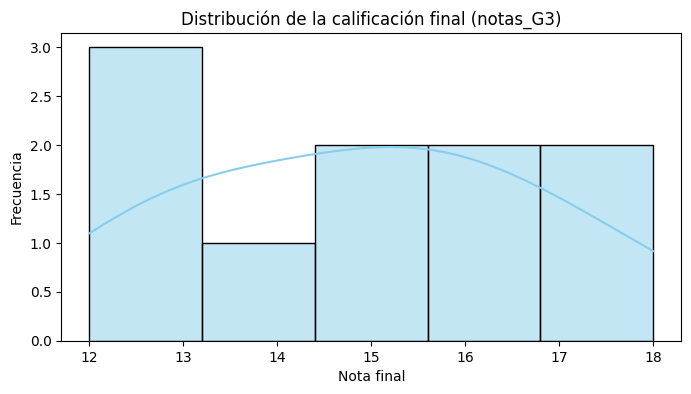

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['notas_G3'], kde=True, color='skyblue')
plt.title('Distribución de la calificación final (notas_G3)')
plt.xlabel('Nota final')
plt.ylabel('Frecuencia')
plt.show()


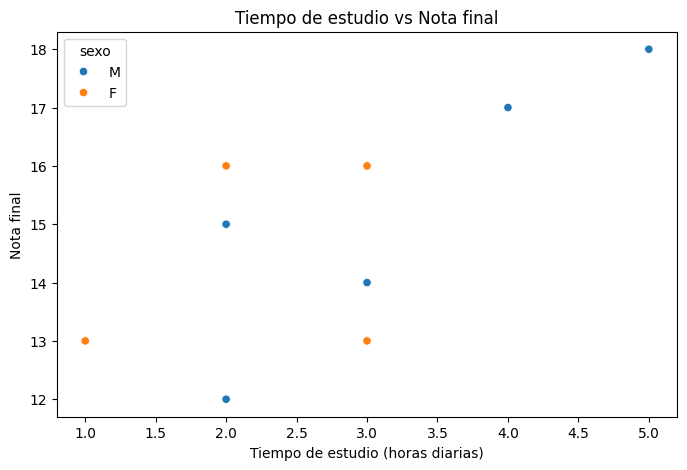

In [14]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='tiempo_estudio', y='notas_G3', data=df, hue='sexo')
plt.title('Tiempo de estudio vs Nota final')
plt.xlabel('Tiempo de estudio (horas diarias)')
plt.ylabel('Nota final')
plt.show()


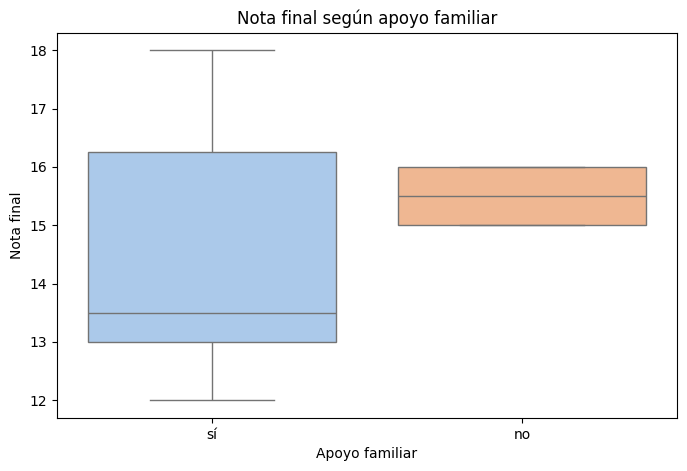

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x='familia_apoyo', y='notas_G3', data=df, palette='pastel', hue='familia_apoyo', legend=False)
plt.title('Nota final según apoyo familiar')
plt.xlabel('Apoyo familiar')
plt.ylabel('Nota final')
plt.show()



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Convertir variable categórica 'familia_apoyo' a numérica
df['familia_apoyo_num'] = df['familia_apoyo'].map({'sí': 1, 'no': 0})

# Seleccionar variables predictoras
X = df[['sexo', 'edad', 'tiempo_estudio', 'notas_G1', 'notas_G2', 'familia_apoyo_num']]

# Convertir 'sexo' a variable dummy (0/1)
X = pd.get_dummies(X, columns=['sexo'], drop_first=True)

y = df['notas_G3']

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear modelo y entrenar
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir y evaluar
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")


Error cuadrático medio (MSE): 0.00
Coeficiente de determinación (R²): 1.00


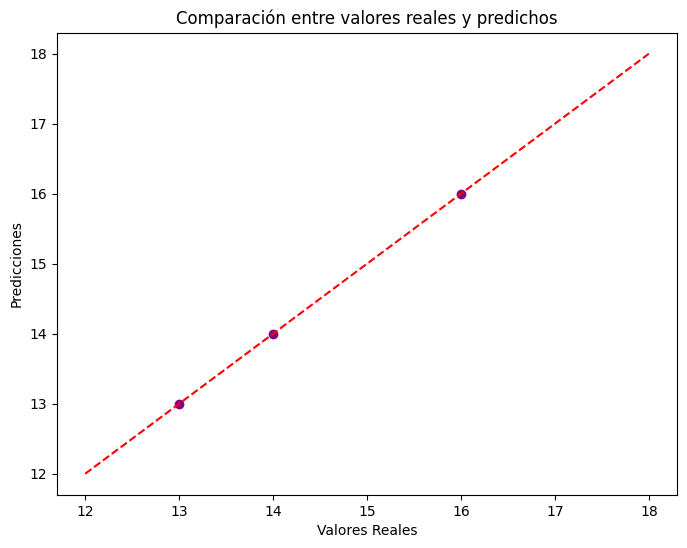

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # línea ideal
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Comparación entre valores reales y predichos')
plt.show()


In [19]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar modelo
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = modelo_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}")
print(f"Random Forest - R²: {r2_rf:.2f}")


Random Forest - MSE: 0.09
Random Forest - R²: 0.94


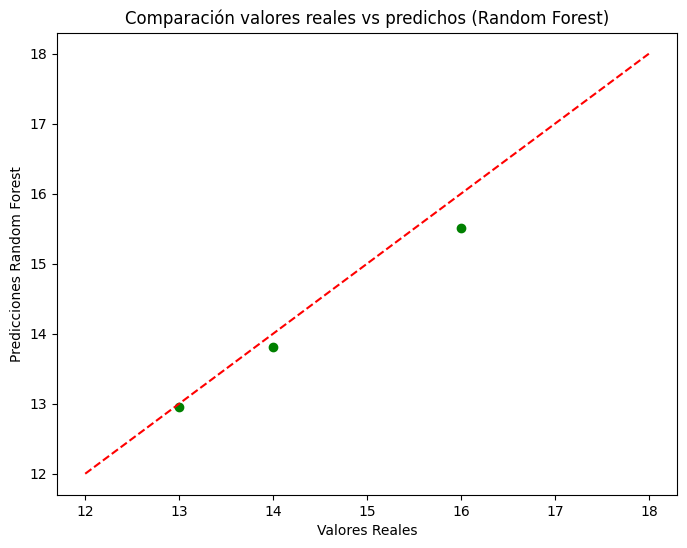

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # línea ideal
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Random Forest')
plt.title('Comparación valores reales vs predichos (Random Forest)')
plt.show()


In [21]:
print("----- Resumen de modelos -----\n")

print(f"Regresión Lineal - Error cuadrático medio (MSE): {mse:.2f}")
print(f"Regresión Lineal - Coeficiente de determinación (R²): {r2:.2f}\n")

print(f"Random Forest - Error cuadrático medio (MSE): {mse_rf:.2f}")
print(f"Random Forest - Coeficiente de determinación (R²): {r2_rf:.2f}\n")

print("Recomendaciones:")
print("- Si buscas interpretabilidad, la regresión lineal es mejor porque es simple y explica la relación entre variables.")
print("- Si buscas mayor precisión, especialmente con relaciones complejas, el Random Forest suele dar mejores resultados.")
print("- Para mejorar ambos modelos, considera:")
print("  * Más datos")
print("  * Ingeniería de características")
print("  * Ajuste de hiperparámetros")
print("  * Validación cruzada")


----- Resumen de modelos -----

Regresión Lineal - Error cuadrático medio (MSE): 0.00
Regresión Lineal - Coeficiente de determinación (R²): 1.00

Random Forest - Error cuadrático medio (MSE): 0.09
Random Forest - Coeficiente de determinación (R²): 0.94

Recomendaciones:
- Si buscas interpretabilidad, la regresión lineal es mejor porque es simple y explica la relación entre variables.
- Si buscas mayor precisión, especialmente con relaciones complejas, el Random Forest suele dar mejores resultados.
- Para mejorar ambos modelos, considera:
  * Más datos
  * Ingeniería de características
  * Ajuste de hiperparámetros
  * Validación cruzada
